<a href="https://colab.research.google.com/github/savvyguru/TensorFlow/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify image of numbers

This classifier aims to recognise numbers using a vanilla Neural Network

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Import Number [MNIST](http://yann.lecun.com/exdb/mnist/) dataset that contains numbers from 0 to 9

In [0]:
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
#print(train_labels)

Inspect size of dataset

In [22]:

len(train_images)

60000

Inspect dimensions of test image

In [23]:
train_images.shape

(60000, 28, 28)

**Data Preprocessing:**
*   Pixel values betweeb 0 to 255
*   Scale the values from 0 to 1



In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Construct Neural Network** by Layer

In [0]:
#first layer is preprocessing
#second layer is actual NN with weights
#third layer is dropout
#last layer maps to final output between 0 - 9
first_layer = keras.layers.Flatten(input_shape = (28,28))
second_layer = keras.layers.Dense(128,activation='relu')
third_layer = tf.keras.layers.Dropout(0.2)
fourth_layer = keras.layers.Dense(10) 
model = keras.Sequential([first_layer, second_layer, third_layer,fourth_layer])

**Compile Neural Network**

In [0]:
Optimizer = 'adam'
Loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
Metrics = ['accuracy']
model.compile(optimizer=Optimizer,loss=Loss_function, metrics=Metrics)

**Train the model**:
Vary Epochs for accuracy

In [27]:
Epochs = 10
model.fit(train_images,train_labels,epochs=Epochs)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1435 - accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1095 - accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9835
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.045

**Test model** with test set:


1.   Observe difference between test set and train set accuracy
2.   Signs of overfitting



In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Accuracy of the model is: ",test_acc)

313/313 - 0s - loss: 0.0698 - accuracy: 0.9794
Accuracy of the model is:  0.9793999791145325


**Deployment**


*   Display image of number to be recognised



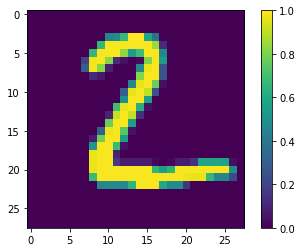

In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

testImage = test_images[1]
img = (np.expand_dims(testImage,0))
prediction = probability_model.predict(img)
plt.figure()
plt.imshow(testImage)
plt.colorbar()
plt.grid(False)
plt.show()

**Probabilty Distributions** of possible numbers the tested image could be

In [30]:
prediction

array([[4.9355947e-10, 4.3159300e-05, 9.9995685e-01, 6.9540178e-09,
        2.1664090e-21, 1.6427093e-10, 5.9186168e-13, 5.8354789e-16,
        1.0143982e-09, 6.0026169e-18]], dtype=float32)

**Prediction of the actual number**

In [31]:
np.argmax(prediction)

2